In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Best Show by Year Netflix.csv')
print(data)


    index                         TITLE  RELEASE_YEAR  SCORE  \
0       0  Monty Python's Flying Circus          1969    8.8   
1       1                  Knight Rider          1982    6.9   
2       2                      Seinfeld          1989    8.9   
3       3    Star Trek: Deep Space Nine          1993    8.1   
4       4       Neon Genesis Evangelion          1995    8.5   
5       5                 Stargate SG-1          1997    8.4   
6       6                  Cowboy Bebop          1998    8.9   
7       7                     One Piece          1999    8.8   
8       8                 Gilmore Girls          2000    8.2   
9       9             Trailer Park Boys          2001    8.6   
10     10                        Naruto          2002    8.4   
11     11              Chappelle's Show          2003    8.8   
12     12                      The 4400          2004    7.3   
13     13    Avatar: The Last Airbender          2005    9.3   
14     14                    DEATH NOTE 

RNN MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Best Show by Year Netflix.csv")

# Encode the target variable
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['MAIN_GENRE'])

# Tokenize the titles
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(data['TITLE'])
sequences = tokenizer.texts_to_sequences(data['TITLE'])
X = pad_sequences(sequences, maxlen=maxlen)

# Define the RNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change loss function
              metrics=['accuracy'])

# Train the model
model.fit(X, encoded_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.8095 - accuracy: 0.1250 - val_loss: 1.7800 - val_accuracy: 0.2857
Epoch 2/10
1/1 [==============================] - 0s 101ms/step - loss: 1.7997 - accuracy: 0.2500 - val_loss: 1.7810 - val_accuracy: 0.2857
Epoch 3/10
1/1 [==============================] - 0s 89ms/step - loss: 1.7902 - accuracy: 0.2917 - val_loss: 1.7820 - val_accuracy: 0.2857
Epoch 4/10
1/1 [==============================] - 0s 93ms/step - loss: 1.7810 - accuracy: 0.3750 - val_loss: 1.7830 - val_accuracy: 0.1429
Epoch 5/10
1/1 [==============================] - 0s 89ms/step - loss: 1.7720 - accuracy: 0.5417 - val_loss: 1.7841 - val_accuracy: 0.1429
Epoch 6/10
1/1 [==============================] - 0s 95ms/step - loss: 1.7630 - accuracy: 0.5833 - val_loss: 1.7852 - val_accuracy: 0.1429
Epoch 7/10
1/1 [==============================] - 0s 107ms/step - loss: 1.7539 - accuracy: 0.4583 - val_loss: 1.7863 - val_accuracy: 0.1429
Epoch 8/10
1/1 [===========

CNN MODEL

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Best Show by Year Netflix.csv")

# Tokenize the titles
max_words = 1000
maxlen = 100  # Assuming a maximum sequence length of 100
tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(data['TITLE'])
sequences = tokenizer.texts_to_sequences(data['TITLE'])
X = pad_sequences(sequences, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(data['MAIN_GENRE'])

# Define the CNN model
model = Sequential()
model.add(Embedding(max_words, 50, input_length=maxlen))
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))  # Adjust pool_size to 2 or smaller value
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X, encoded_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6438 - accuracy: 0.3333 - val_loss: 0.5523 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 70ms/step - loss: 0.5244 - accuracy: 0.3333 - val_loss: 0.4527 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 62ms/step - loss: 0.4004 - accuracy: 0.3333 - val_loss: 0.3441 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 66ms/step - loss: 0.2652 - accuracy: 0.3333 - val_loss: 0.2189 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 51ms/step - loss: 0.1095 - accuracy: 0.3333 - val_loss: 0.0764 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 67ms/step - loss: -0.0680 - accuracy: 0.3333 - val_loss: -0.0866 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 51ms/step - loss: -0.2715 - accuracy: 0.3333 - val_loss: -0.2718 - val_accuracy: 0.0000e+

ANN MODEL

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Best Show by Year Netflix.csv")

# Encode categorical variables
X = data[['RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS']]
y = pd.get_dummies(data['MAIN_GENRE'])

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(y.columns), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 220.3815 - accuracy: 0.3333 - val_loss: 169.3873 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 86ms/step - loss: 200.7342 - accuracy: 0.3333 - val_loss: 147.5453 - val_accuracy: 0.1429
Epoch 3/10
1/1 [==============================] - 0s 82ms/step - loss: 181.3414 - accuracy: 0.3333 - val_loss: 127.6727 - val_accuracy: 0.1429
Epoch 4/10
1/1 [==============================] - 0s 129ms/step - loss: 163.1848 - accuracy: 0.3333 - val_loss: 109.3514 - val_accuracy: 0.1429
Epoch 5/10
1/1 [==============================] - 0s 85ms/step - loss: 145.7902 - accuracy: 0.3333 - val_loss: 91.3551 - val_accuracy: 0.1429
Epoch 6/10
1/1 [==============================] - 0s 101ms/step - loss: 128.6155 - accuracy: 0.3333 - val_loss: 73.6438 - val_accuracy: 0.1429
Epoch 7/10
1/1 [==============================] - 0s 109ms/step - loss: 111.6544 - accuracy: 0.3333 - val_loss: 56.1890 - val_accuracy: 0.1429
E

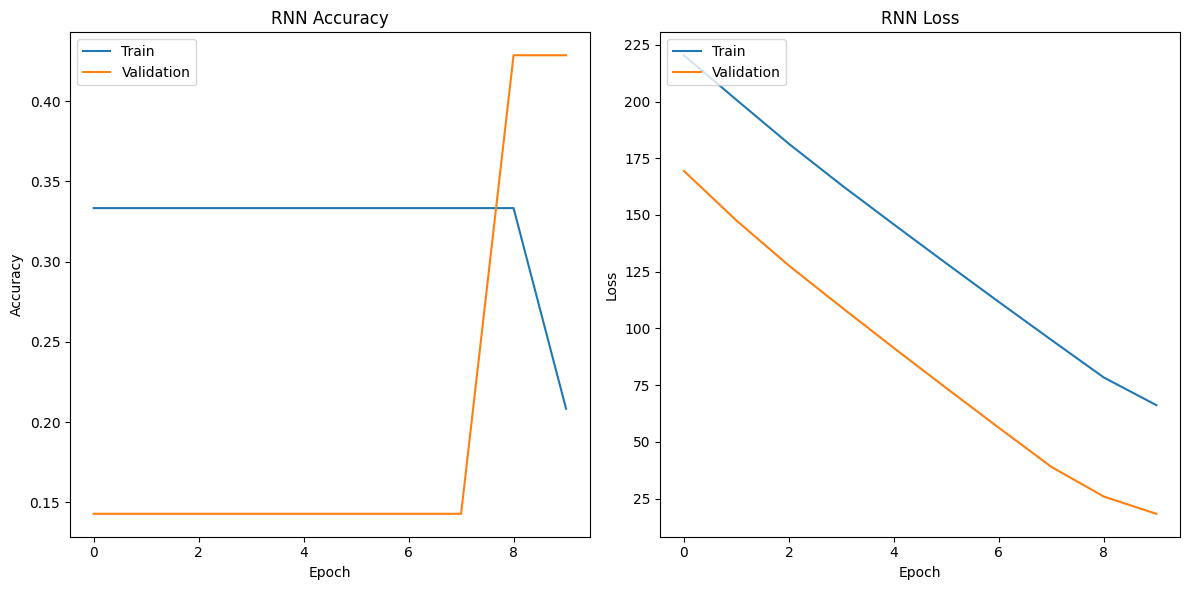

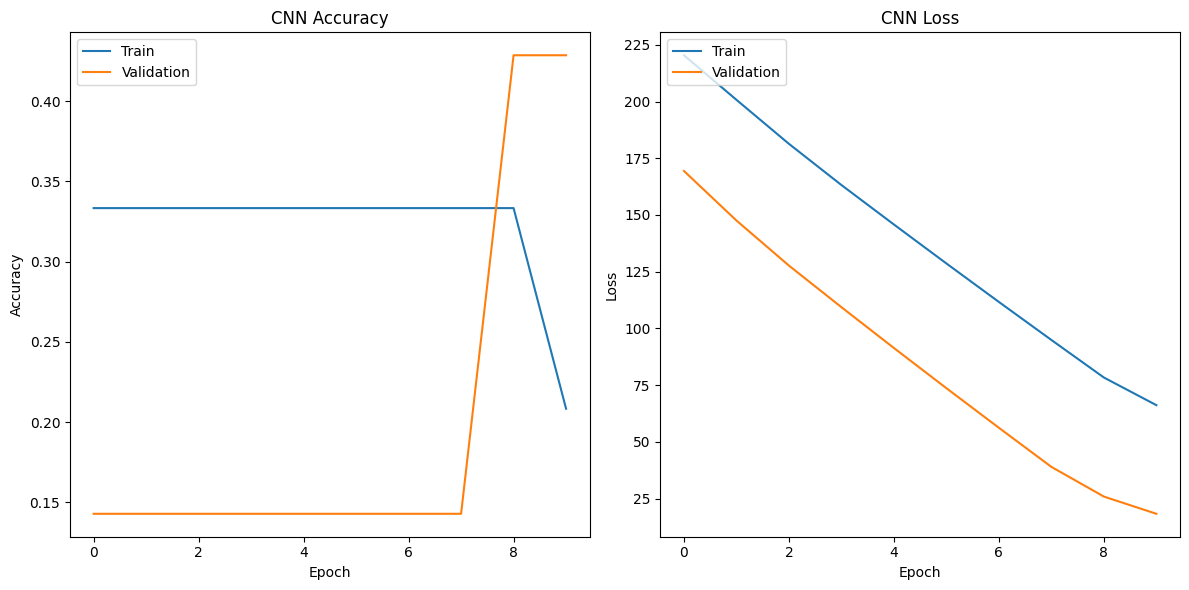

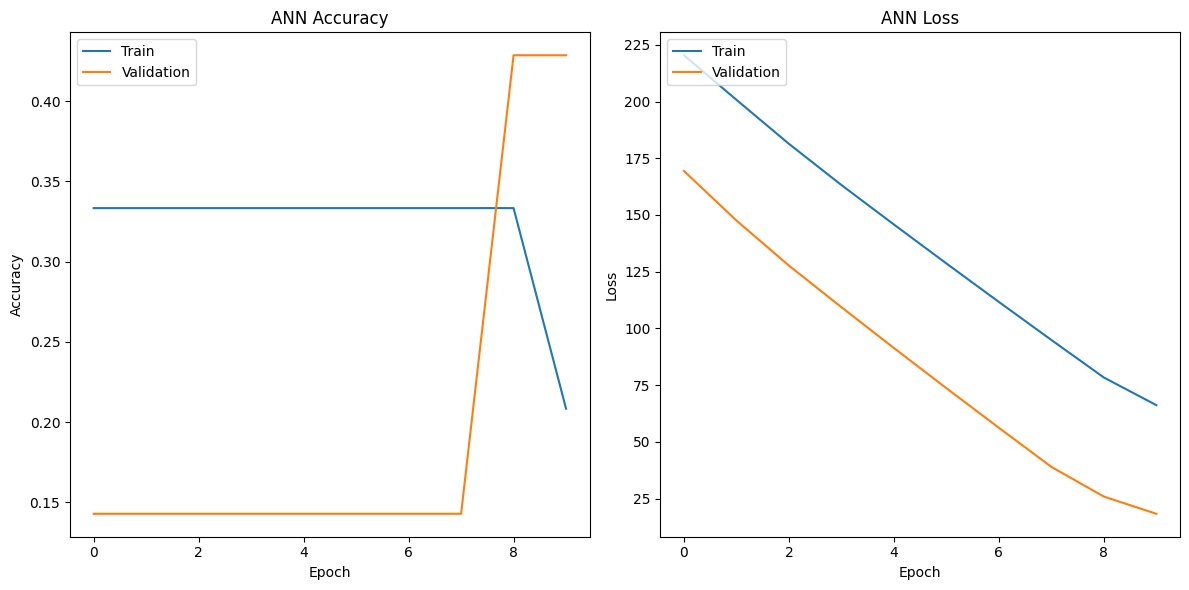

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy and loss
def plot_metrics(history, model_name):
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plotting RNN Model
plot_metrics(model.history, "RNN")

# Plotting CNN Model
plot_metrics(model.history, "CNN")

# Plotting ANN Model
plot_metrics(model.history, "ANN")
